# import

In [1]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
from os import path

In [3]:
import taproc as tp
from taproc.pre_processing import *
from taproc.dataset import *
from taproc.learner import *
from taproc.feature import *

# read file

In [4]:
file_path = Path('/media/zero/dropbox/Dropbox/Data science project/kaggle/home_credit_default_risk/data')

In [5]:
app_train = pd.read_csv(str(file_path/'application_train.csv'))

In [6]:
app_train_proc, y, na_dict = tabular_proc(app_train, y_fld = 'TARGET', max_n_cat=15)

# dataset

In [7]:
dataset = LGBDataset.sklearn_split(app_train_proc, y)

# keep feature

In [8]:
keep_ft = flat_list([['EXT_SOURCE_3'],
 ['EXT_SOURCE_2'],
 ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['EXT_SOURCE_1'],
 ['DAYS_BIRTH'],
 ['DAYS_EMPLOYED'],
 ['CODE_GENDER_M'],
 ['NAME_EDUCATION_TYPE_Higher education'],
 ['EXT_SOURCE_1_na'],
 ['DAYS_ID_PUBLISH'],
 ['NAME_FAMILY_STATUS_Married'],
 ['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
 ['CODE_GENDER_F'],
 ['NAME_CONTRACT_TYPE_Cash loans'],
 ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
 ['AMT_REQ_CREDIT_BUREAU_HOUR_na',
  'AMT_REQ_CREDIT_BUREAU_DAY_na',
  'AMT_REQ_CREDIT_BUREAU_WEEK_na',
  'AMT_REQ_CREDIT_BUREAU_MON_na',
  'AMT_REQ_CREDIT_BUREAU_QRT_na',
  'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
 ['AMT_REQ_CREDIT_BUREAU_QRT'],
 ['FLAG_DOCUMENT_3'],
 ['AMT_INCOME_TOTAL'],
 ['REGION_POPULATION_RELATIVE'],
 ['NAME_INCOME_TYPE_Working'],
 ['NONLIVINGAPARTMENTS_MODE',
  'NONLIVINGAPARTMENTS_AVG',
  'NONLIVINGAPARTMENTS_MEDI'],
 ['FLAG_WORK_PHONE'],
 ['AMT_REQ_CREDIT_BUREAU_YEAR'],
 ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
 ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI'],
 ['FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE']])

In [9]:
dataset.filter_column(keep_ft)

# baseline model

In [10]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':500,
    'learning_rate':0.1,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    'metric': 'binary_logloss'}

In [11]:
learner = LGBLearner(dataset)

In [12]:
learner.load()

# partial dependence

In [222]:
pdpd = PartialDependence.from_LGBLearner(learner)

In [166]:
dataset.lgb_trn.data.head().T

,197843,212073,278406,169832,256338
EXT_SOURCE_3,0.384207,0.0975816,0.652897,0.42237,0.634706
EXT_SOURCE_2,0.481592,0.341772,0.0760805,0.56522,0.676409
AMT_GOODS_PRICE,315000,135000,468000,225000,675000
AMT_CREDIT,348264,135000,616262,254700,781920
AMT_ANNUITY,25470,6750,22266,27022.5,34443
EXT_SOURCE_1,0.504679,0.513312,0.505998,0.505998,0.505998
DAYS_BIRTH,-13323,-8705,-16768,-10420,-21209
DAYS_EMPLOYED,-495,-402,-1094,-2917,365243
CODE_GENDER_M,1,0,0,1,0
NAME_EDUCATION_TYPE_Higher education,0,0,0,0,0


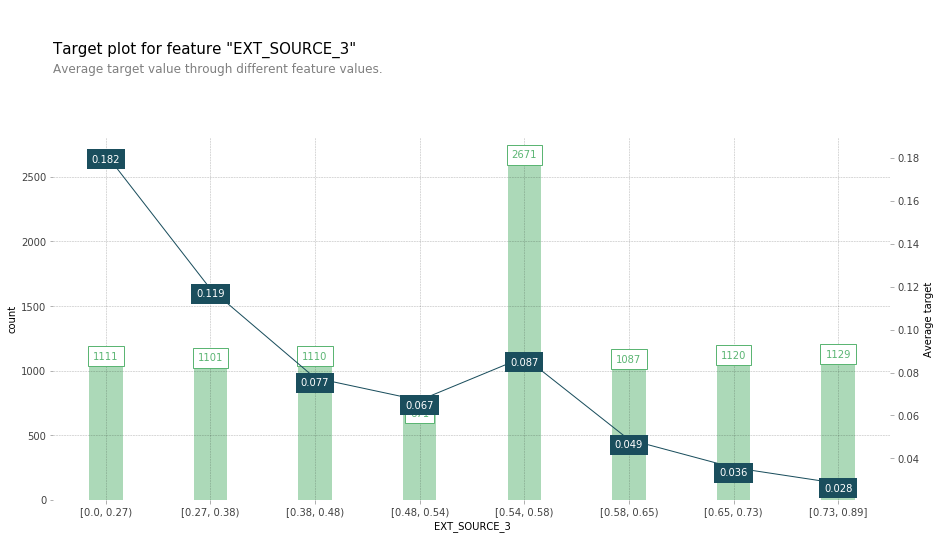

In [223]:
pdpd.info_target('EXT_SOURCE_3')

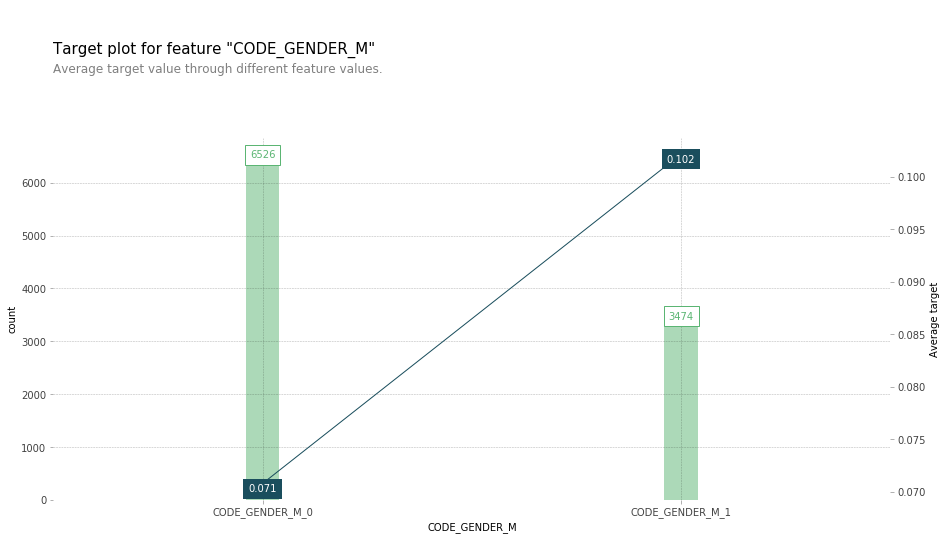

In [224]:
pdpd.info_target('CODE_GENDER_M')

In [225]:
pdpd.summary['info_target']

,x,display_column,count,target
0,0,CODE_GENDER_M_0,6526,0.070794
1,1,CODE_GENDER_M_1,3474,0.102188


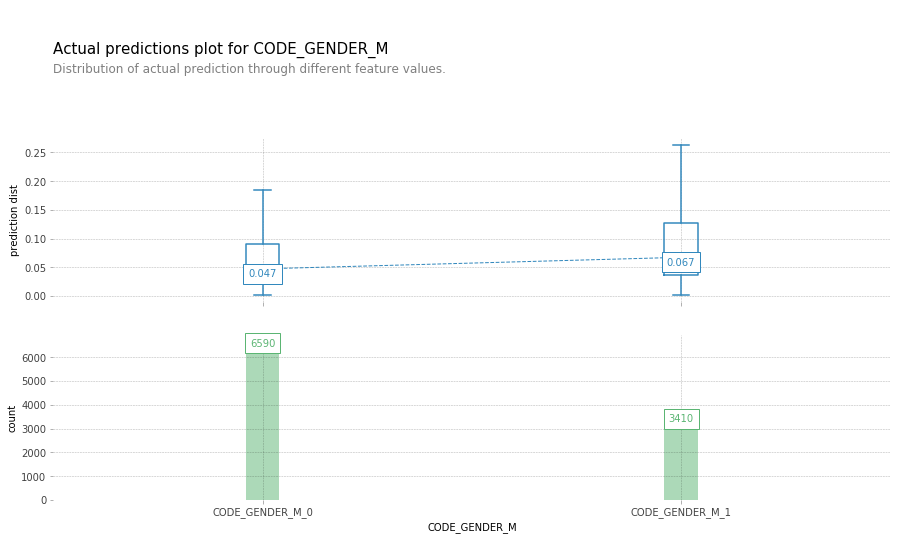

In [226]:
pdpd.info_actual('CODE_GENDER_M')

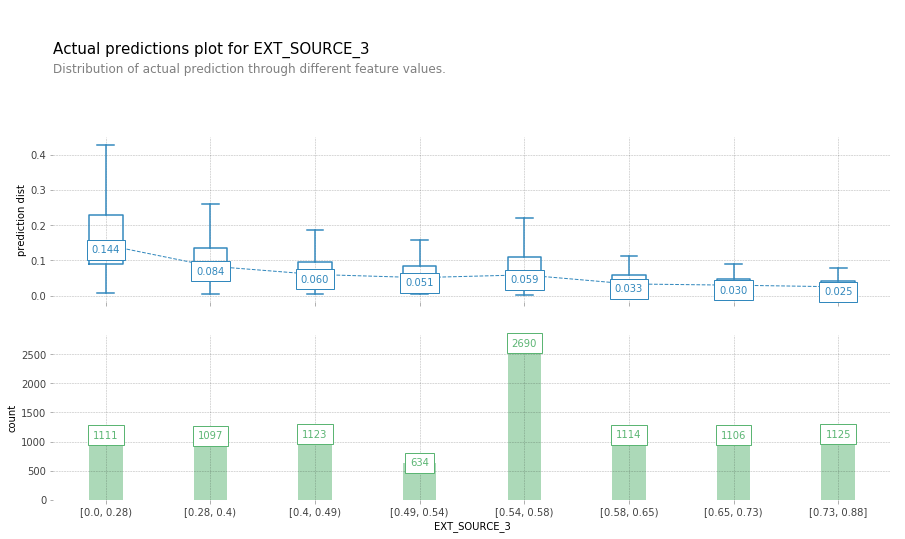

In [227]:
pdpd.info_actual('EXT_SOURCE_3')

In [228]:
pdpd.summary['info_actual']

,x,display_column,value_lower,value_upper,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,"[0.0, 0.28)",0.000527,0.275000,1111,0.090798,0.143951,0.227292
1,1,"[0.28, 0.4)",0.275000,0.396220,1097,0.049714,0.083576,0.136016
2,2,"[0.4, 0.49)",0.396220,0.488455,1123,0.034822,0.059996,0.096349
3,3,"[0.49, 0.54)",0.488455,0.535276,634,0.032607,0.051045,0.082692
4,4,"[0.54, 0.58)",0.535276,0.581484,2690,0.033793,0.058774,0.108268
5,5,"[0.58, 0.65)",0.581484,0.652897,1114,0.021719,0.033087,0.057705
6,6,"[0.65, 0.73)",0.652897,0.725276,1106,0.018687,0.029541,0.047225
7,7,"[0.73, 0.88]",0.725276,0.878740,1125,0.016202,0.024996,0.041187


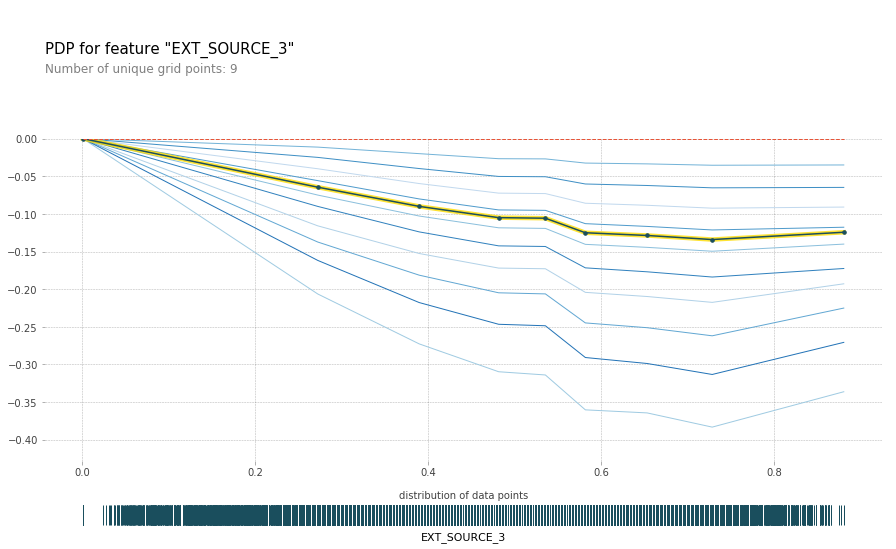

In [229]:
pdpd.isolate('EXT_SOURCE_3')

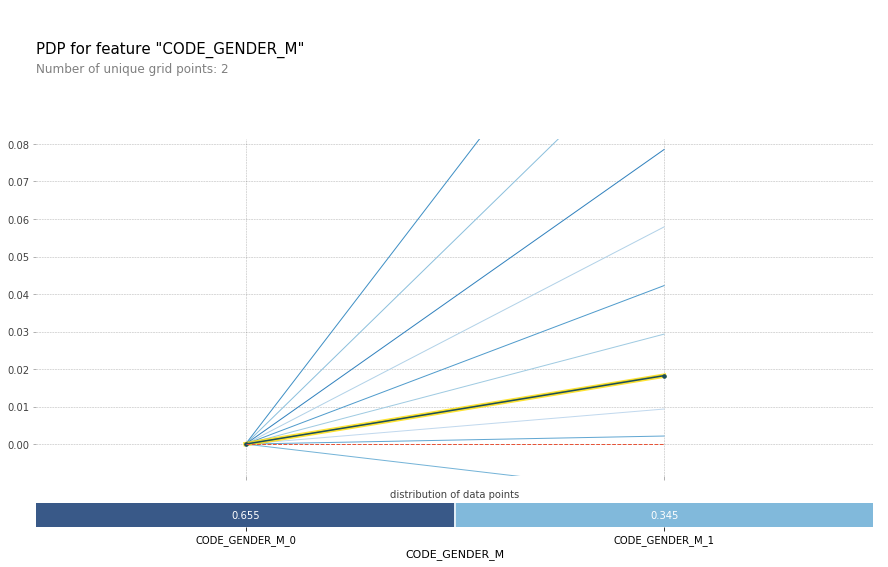

In [230]:
pdpd.isolate('CODE_GENDER_M')

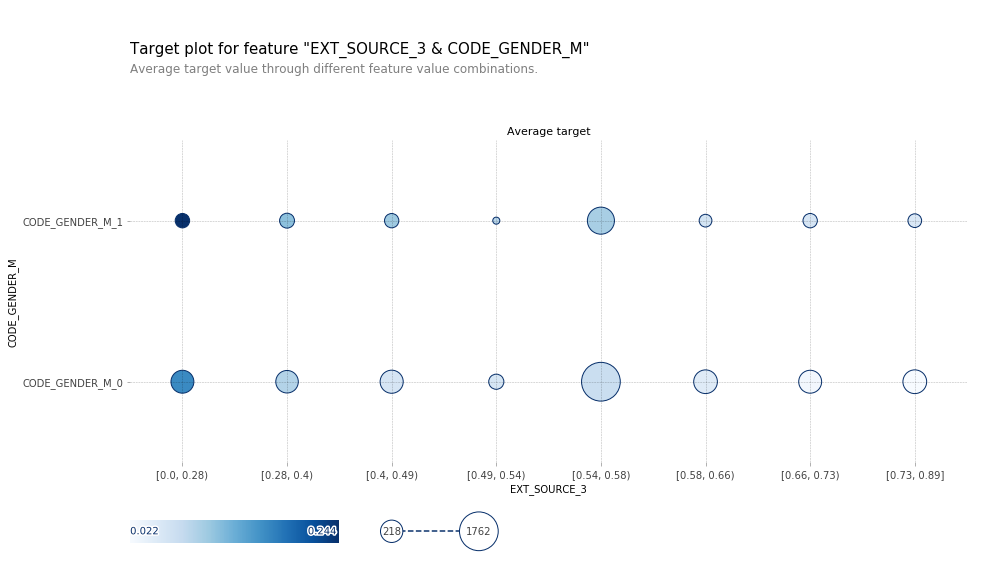

In [231]:
pdpd.target_interact(['EXT_SOURCE_3', 'CODE_GENDER_M'])

In [232]:
pdpd.summary['target_interact']

,x1,x2,display_column_1,display_column_2,value_lower_1,value_upper_1,count,target
0,0,0,"[0.0, 0.28)",CODE_GENDER_M_0,0.000527,0.275000,723,0.167358
1,0,1,"[0.0, 0.28)",CODE_GENDER_M_1,0.000527,0.275000,386,0.243523
2,1,0,"[0.28, 0.4)",CODE_GENDER_M_0,0.275000,0.396220,705,0.090780
3,1,1,"[0.28, 0.4)",CODE_GENDER_M_1,0.275000,0.396220,401,0.114713
4,2,0,"[0.4, 0.49)",CODE_GENDER_M_0,0.396220,0.488455,733,0.060027
5,2,1,"[0.4, 0.49)",CODE_GENDER_M_1,0.396220,0.488455,383,0.104439
6,3,0,"[0.49, 0.54)",CODE_GENDER_M_0,0.488455,0.535276,409,0.058680
7,3,1,"[0.49, 0.54)",CODE_GENDER_M_1,0.488455,0.535276,218,0.087156
8,4,0,"[0.54, 0.58)",CODE_GENDER_M_0,0.535276,0.584990,1762,0.073212
9,4,1,"[0.54, 0.58)",CODE_GENDER_M_1,0.535276,0.584990,944,0.098517


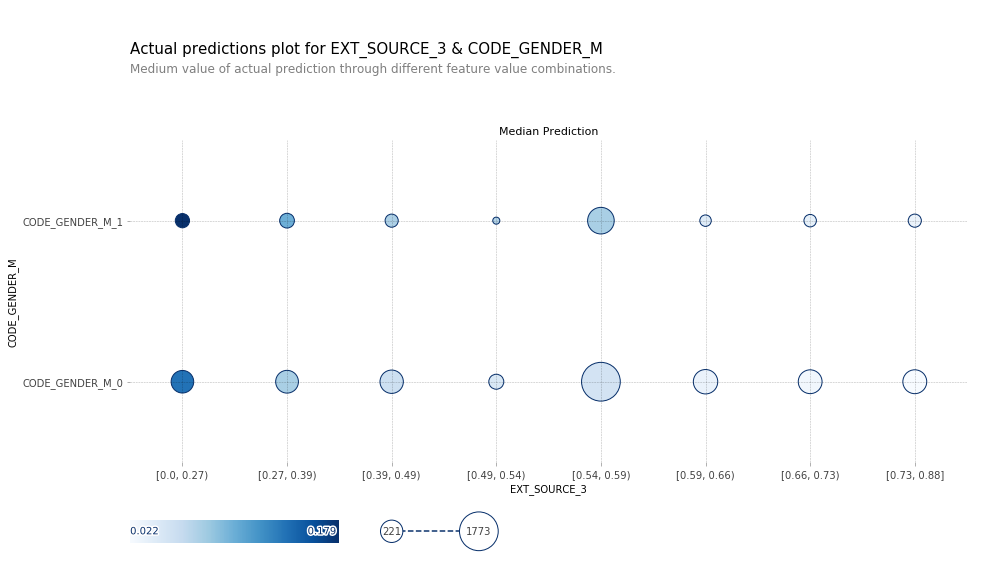

In [233]:
pdpd.actual_interact(['EXT_SOURCE_3', 'CODE_GENDER_M'])

In [234]:
pdpd.summary['actual_interact']

,x1,x2,display_column_1,display_column_2,value_lower_1,value_upper_1,count,actual_prediction_q1,actual_prediction_q2,actual_prediction_q3
0,0,0,"[0.0, 0.27)",CODE_GENDER_M_0,0.000527,0.272134,713,0.088560,0.139242,0.215076
1,0,1,"[0.0, 0.27)",CODE_GENDER_M_1,0.000527,0.272134,384,0.108212,0.179250,0.294187
2,1,0,"[0.27, 0.39)",CODE_GENDER_M_0,0.272134,0.392774,722,0.048072,0.075492,0.123242
3,1,1,"[0.27, 0.39)",CODE_GENDER_M_1,0.272134,0.392774,400,0.060495,0.099462,0.161572
4,2,0,"[0.39, 0.49)",CODE_GENDER_M_0,0.392774,0.486653,751,0.034098,0.055534,0.088181
5,2,1,"[0.39, 0.49)",CODE_GENDER_M_1,0.392774,0.486653,352,0.047070,0.073864,0.121216
6,3,0,"[0.49, 0.54)",CODE_GENDER_M_0,0.486653,0.535276,408,0.028228,0.045344,0.067661
7,3,1,"[0.49, 0.54)",CODE_GENDER_M_1,0.486653,0.535276,221,0.039203,0.070804,0.116442
8,4,0,"[0.54, 0.59)",CODE_GENDER_M_0,0.535276,0.586740,1773,0.031531,0.051318,0.084513
9,4,1,"[0.54, 0.59)",CODE_GENDER_M_1,0.535276,0.586740,925,0.041322,0.075489,0.137384


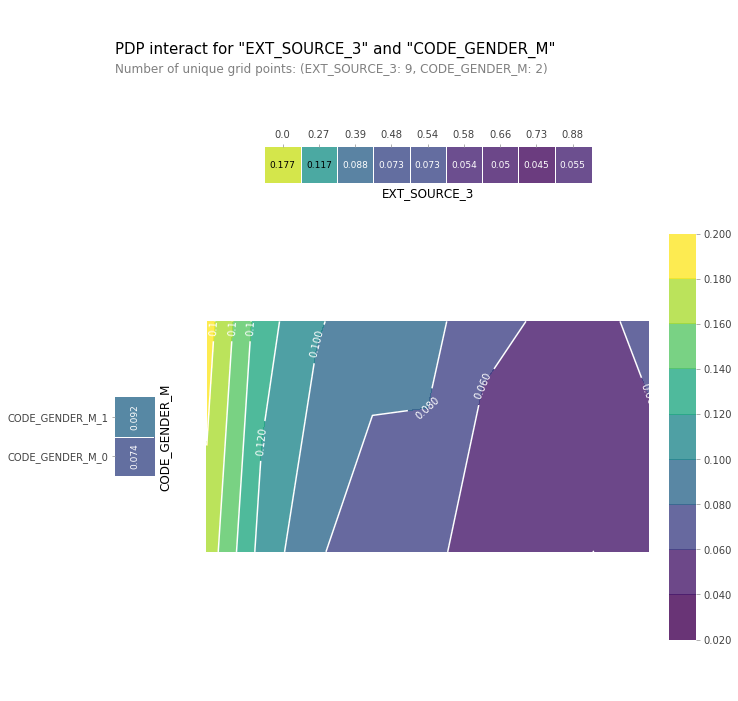

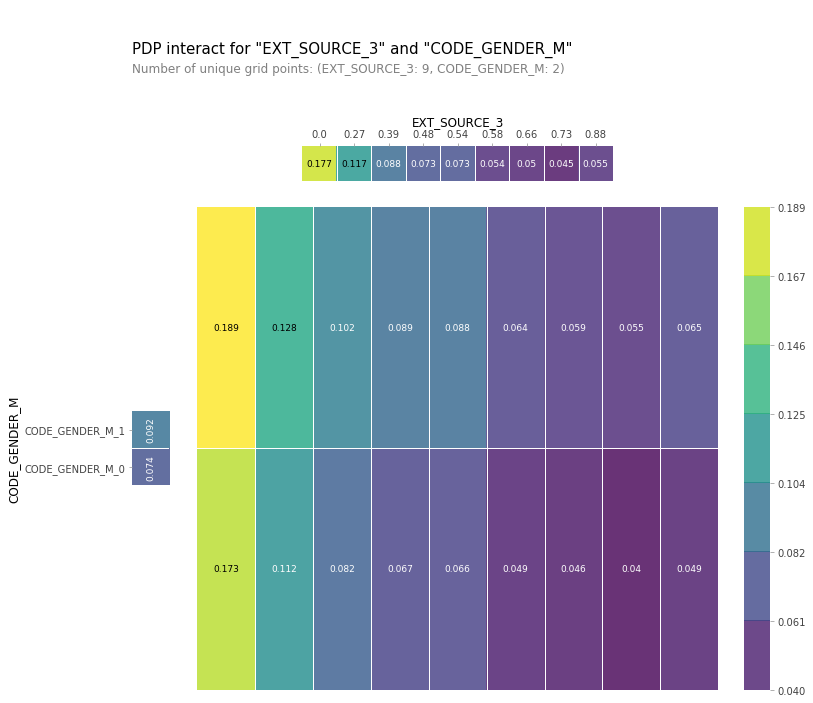

In [235]:
pdpd.pdp_interact(['EXT_SOURCE_3', 'CODE_GENDER_M'])